In [1]:
import numpy as np
import math
import holoviews as hv
import scipy.sparse.linalg as linalg
#%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [2]:
dx = 1
L = 600
yslit = int(round(2*L/3))
dk = 2*math.pi/L
k0 = -0.5*L*dk
dt = 0.6
steps = 200

In [3]:
def barrier(L, yslit):
    V = np.zeros(shape =[int(L), int(L)], dtype = 'int')
    V[:int(L/3-20), yslit] = int(10**15)
    V[int(L/3 + 20):int(2*L/3-20), yslit] = int(10**15)
    V[int(2*L/3 + 20):, yslit] = int(10**15)
    return V

In [10]:
x = np.arange(0, L, 1)
y = np.arange(0, L, 1)
k_x = k0+x*dk
k_xn = np.zeros([L,L])
for i in range (L):
    k_xn[i, :] = np.copy(k_x)
k2= 2*k_xn**2


psi_r = np.zeros(shape = [int(L), int(L), int(steps)]) + 0j

psi_r[0, :, 0] =  np.exp(-0.5*(x-70)**2/20**2 - 1j*0.15*x)

for i in range(1, L):
    psi_r[i, :, 0] = np.copy(psi_r[0, :, 0])
    
psi_k = np.zeros(shape = (int(L), int(L), int(steps)))+0j
psi_r[:, :, 0] =  psi_r[:, :, 0]/np.linalg.norm(psi_r[:, :, 0])

#   Normalize wave function
psi_r[:, :, 0] =  psi_r[:, :, 0]/np.linalg.norm(psi_r[:, :, 0])

V = barrier(L, yslit)

In [11]:
for i in range (0, steps-1):
    psi_k[:, :, i] = np.fft.fft2(psi_r[:, :, i]*np.exp(-dt*V*1j), axes = (0, 1))
    psi_r[:, :, i+1] = np.fft.ifft2(psi_k[:, :, i] *np.exp(-dt*1j*k2), axes = (0,1))

b':HoloMap   [Time]\n   :Image   [x,y]   (z)'
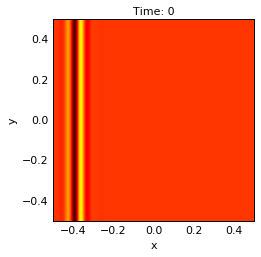
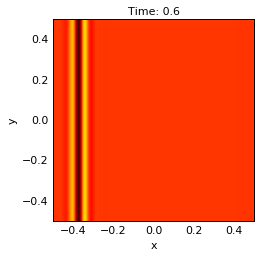
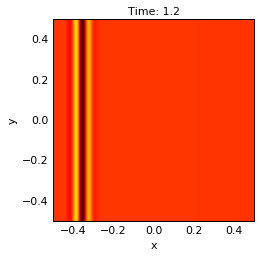
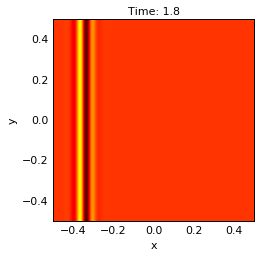
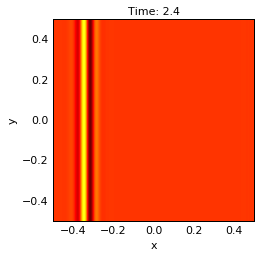
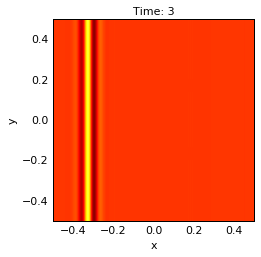
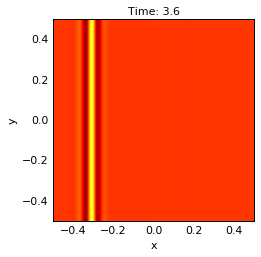
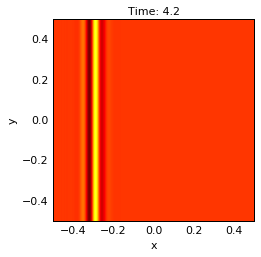
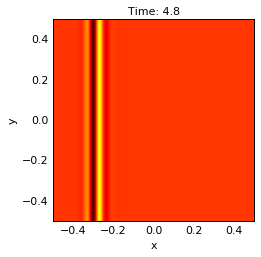
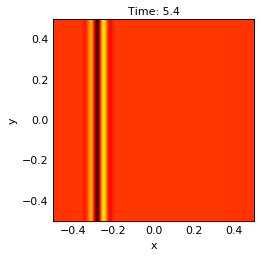
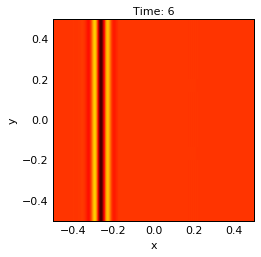
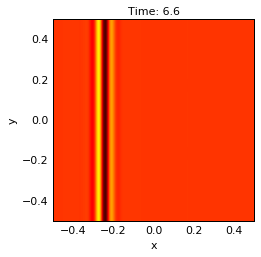
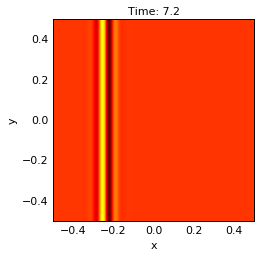
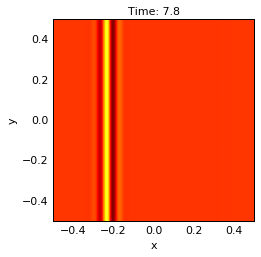
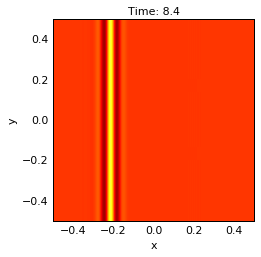
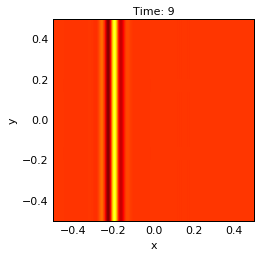
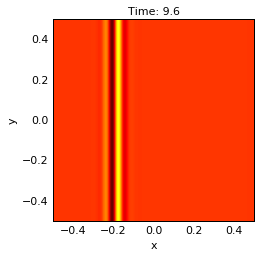
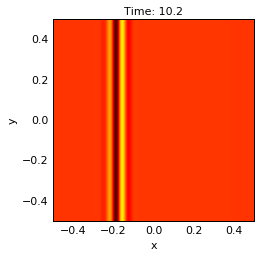
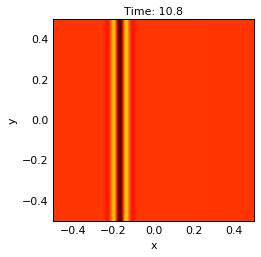
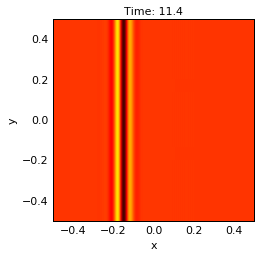
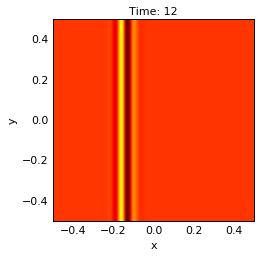
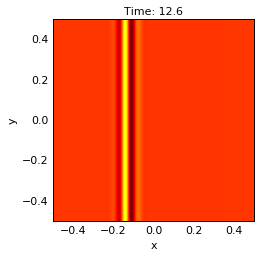
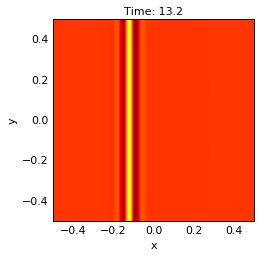
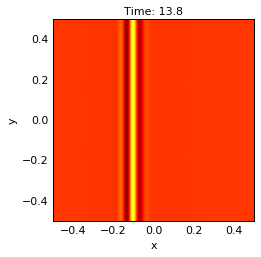
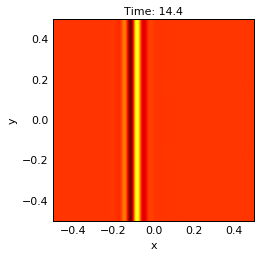
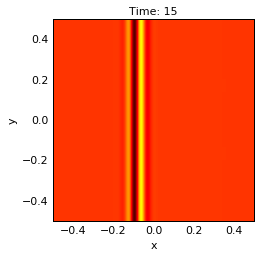
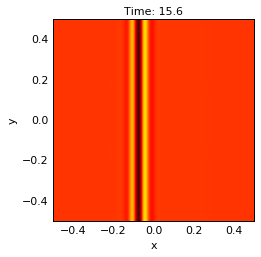
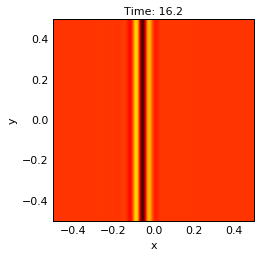
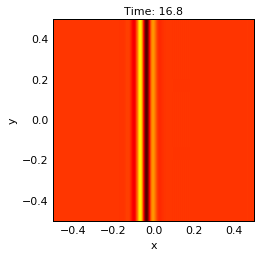
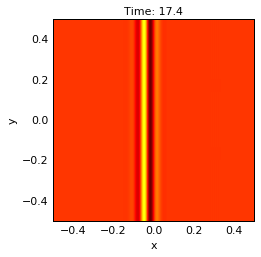
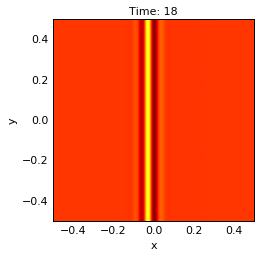
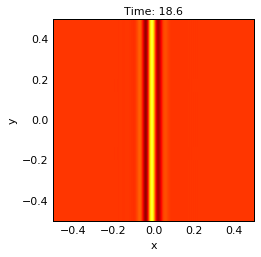
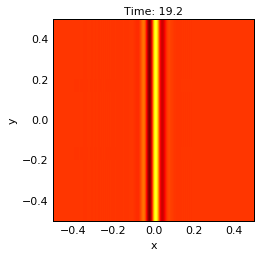
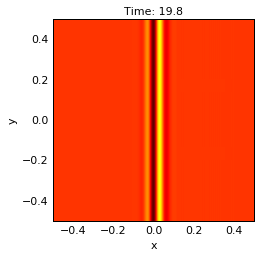
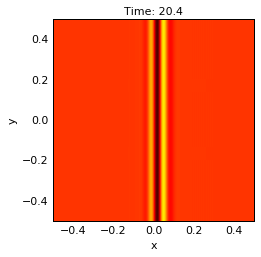
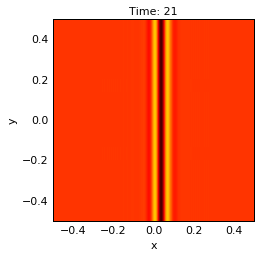
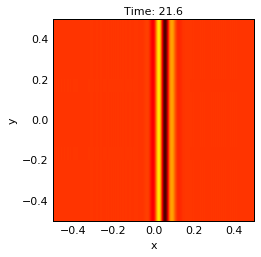
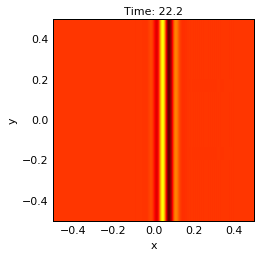
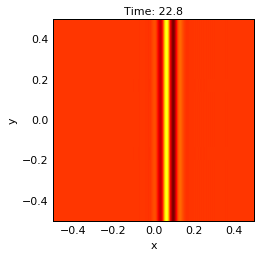
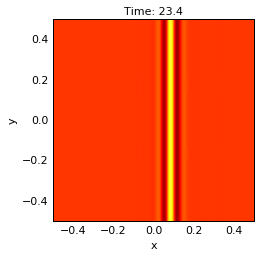
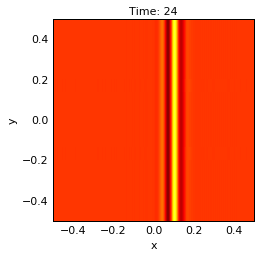
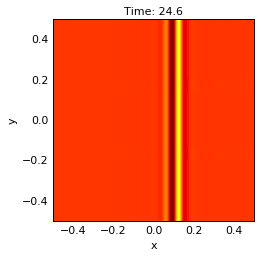
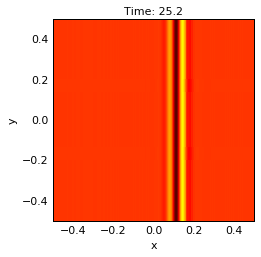
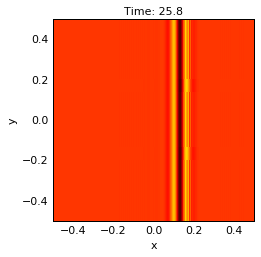
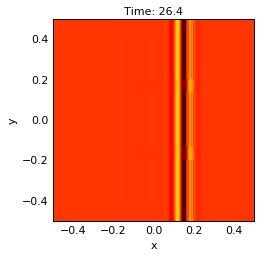
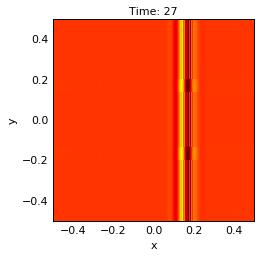
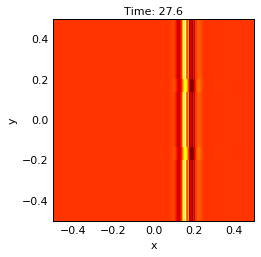
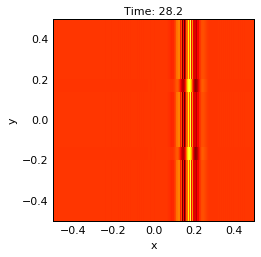
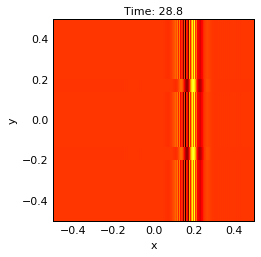
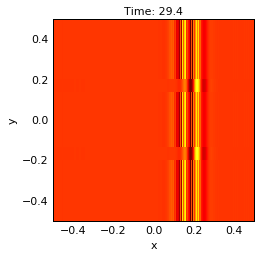
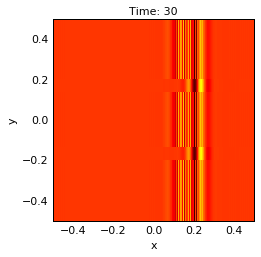
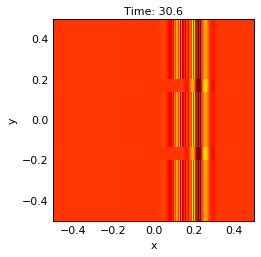
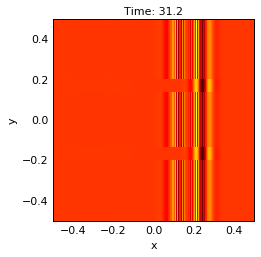
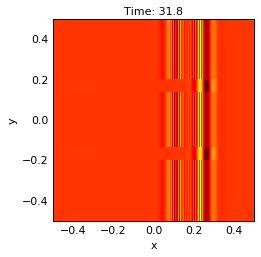
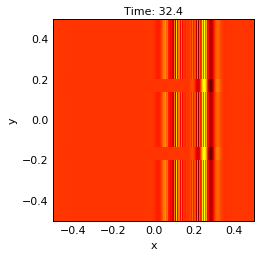
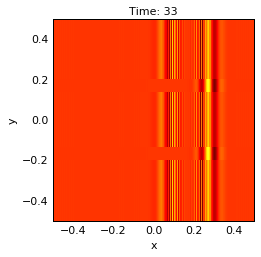
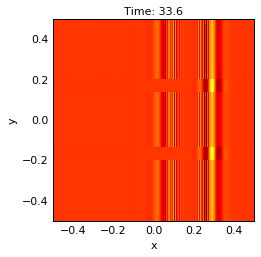
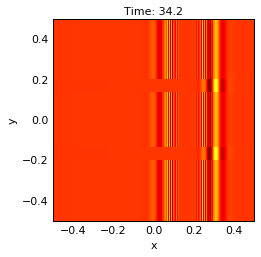
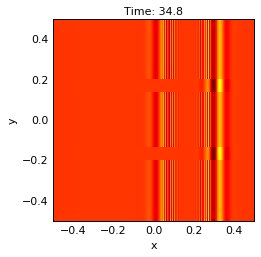
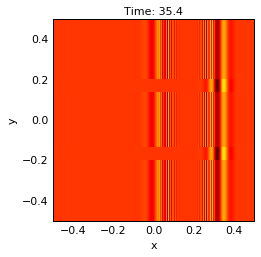
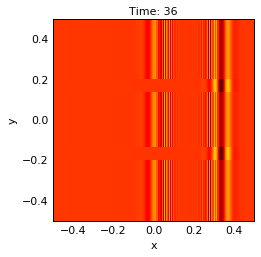
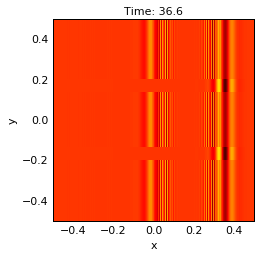
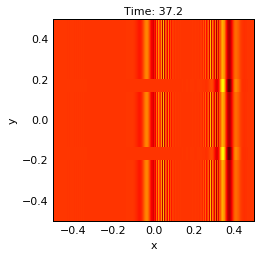
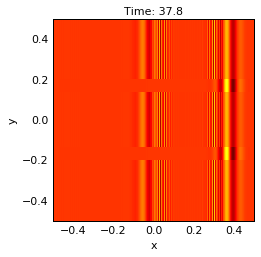
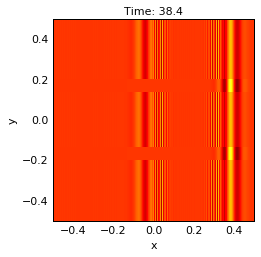
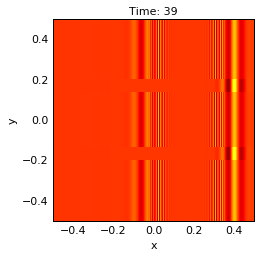
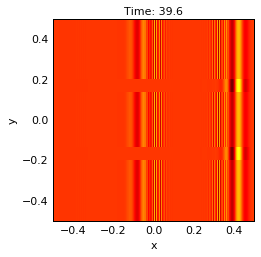
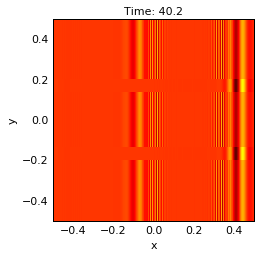
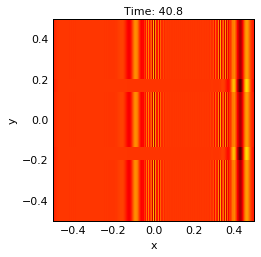
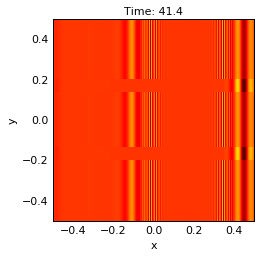
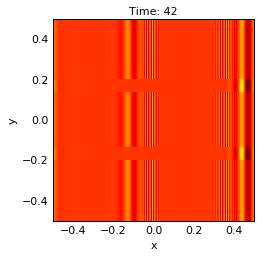
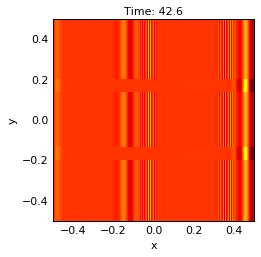
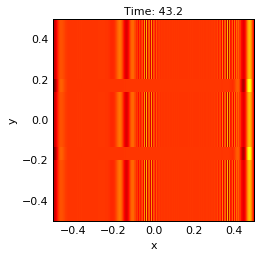
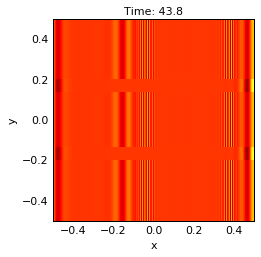
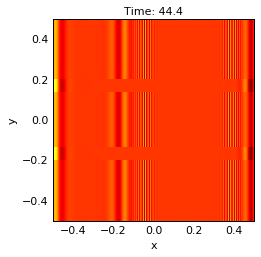
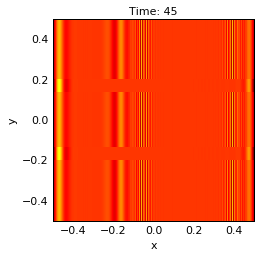
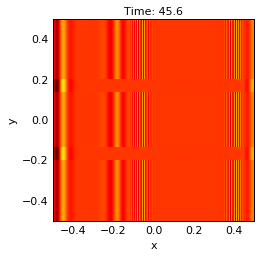
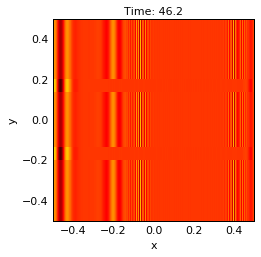
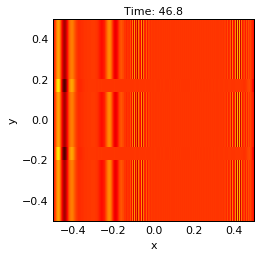
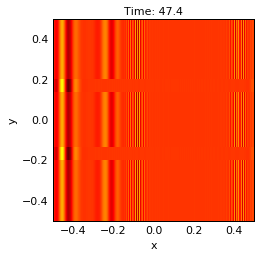
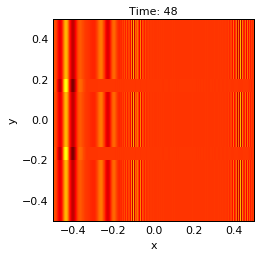
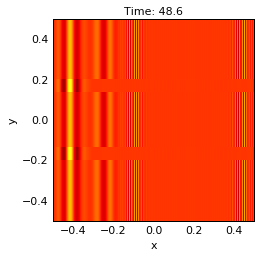
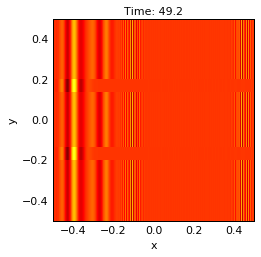
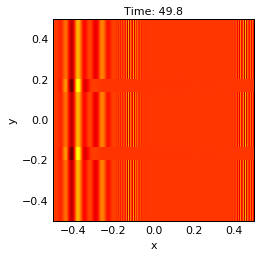
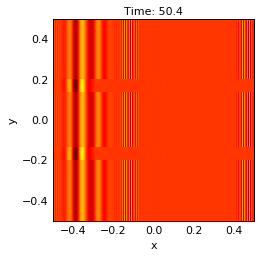
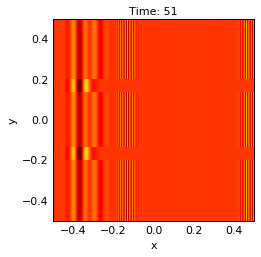
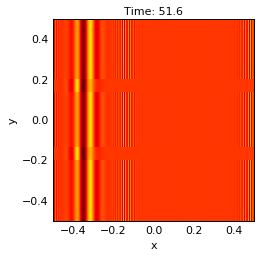
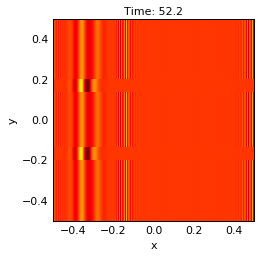
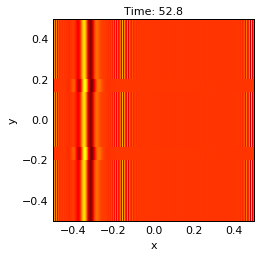
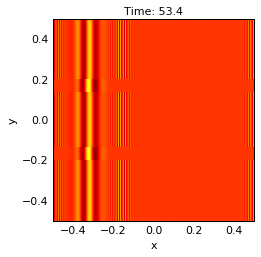
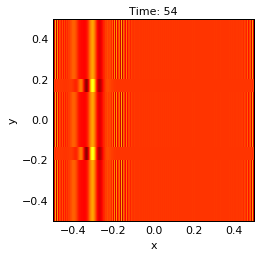
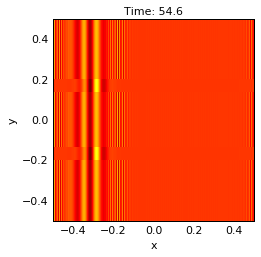
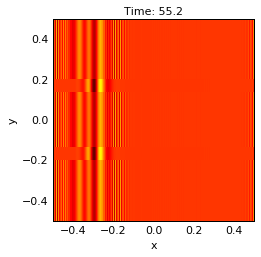
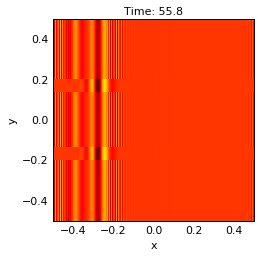
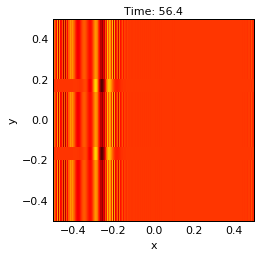
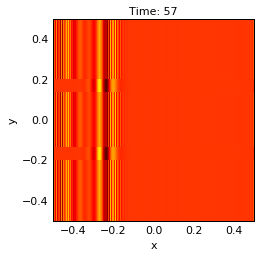
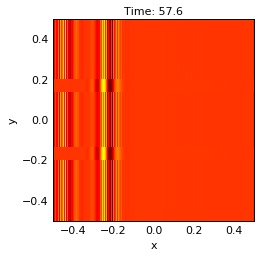
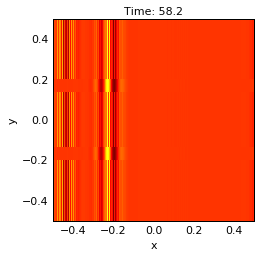
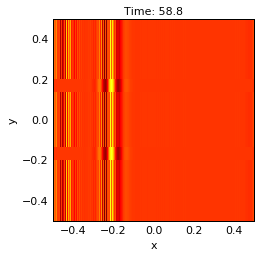
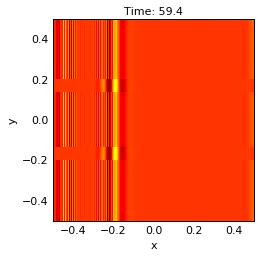
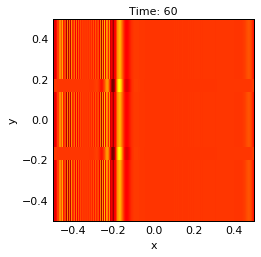
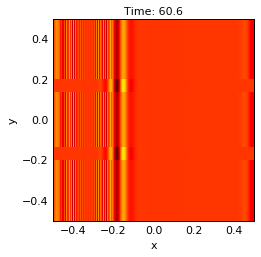
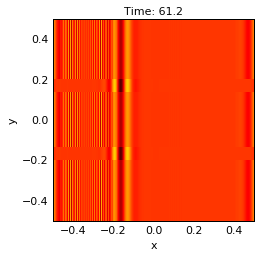
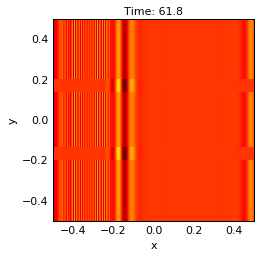
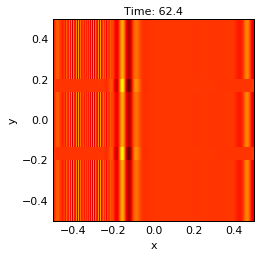
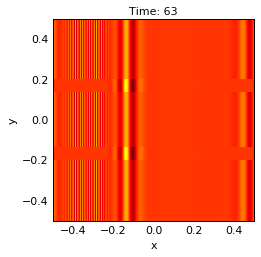
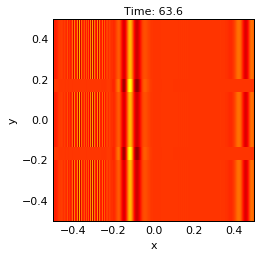
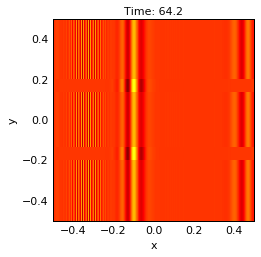
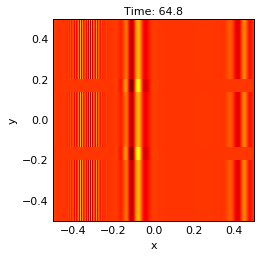
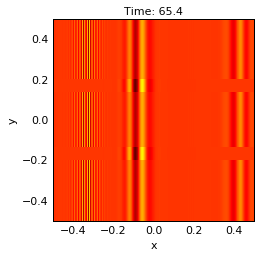
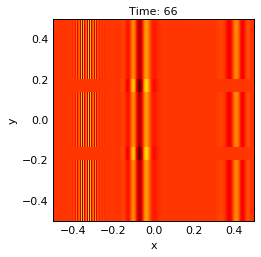
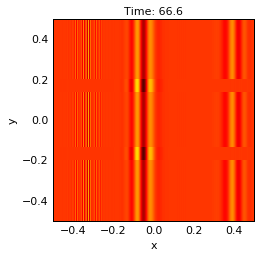
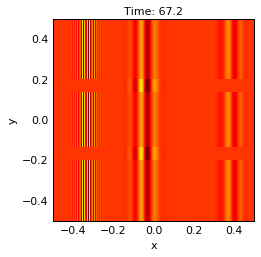
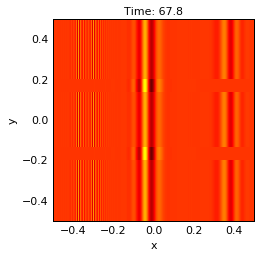
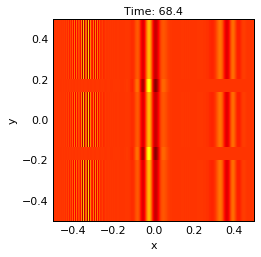
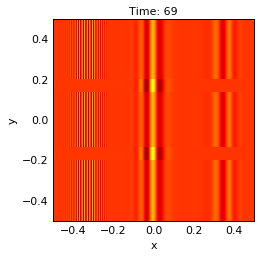
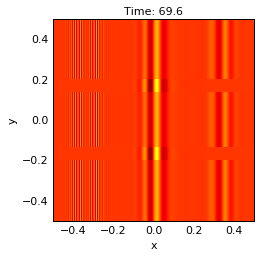
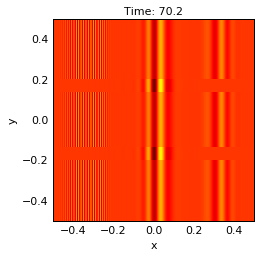
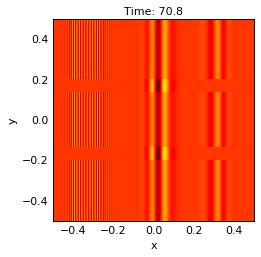
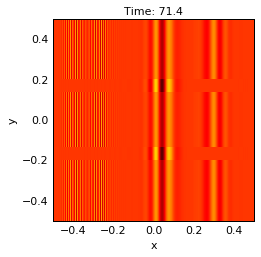
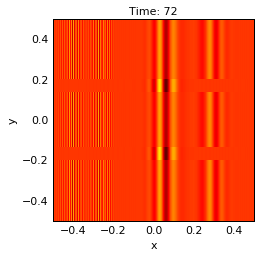
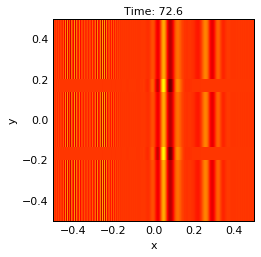
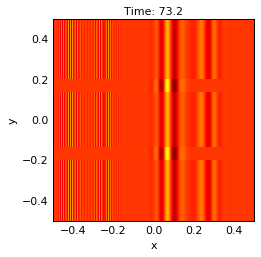
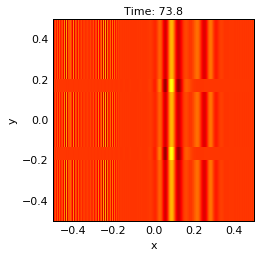
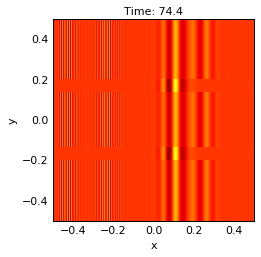
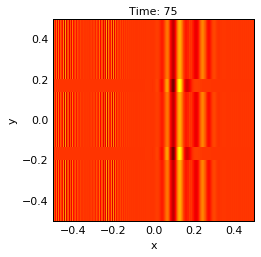
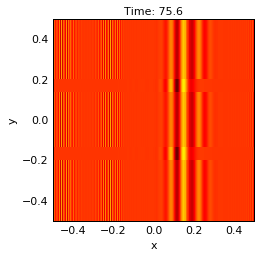
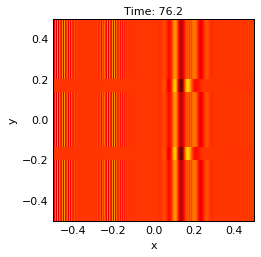
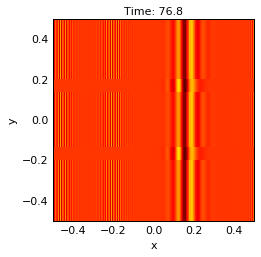
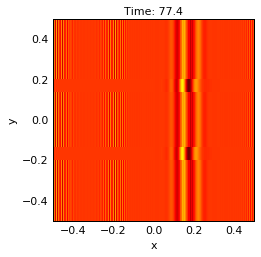
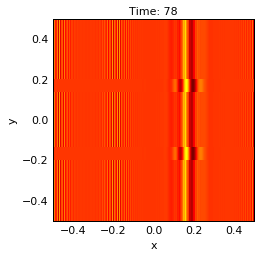
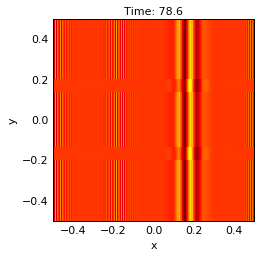
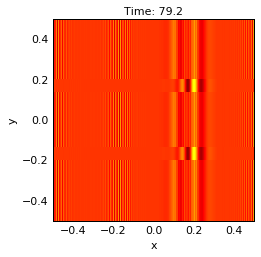
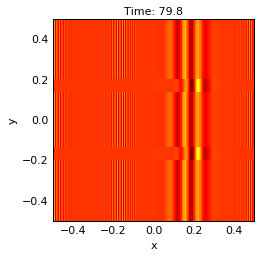
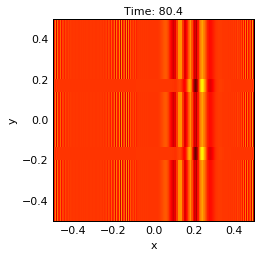
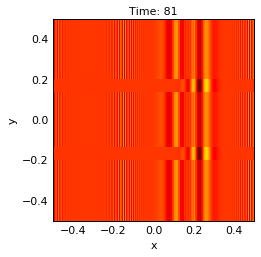
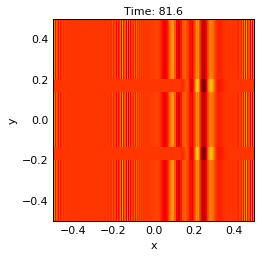
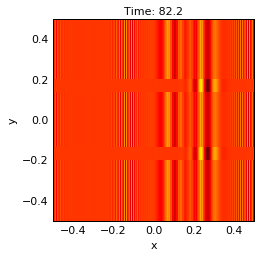
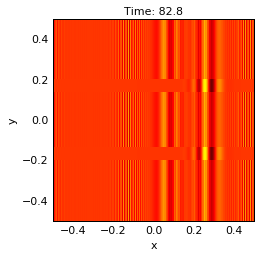
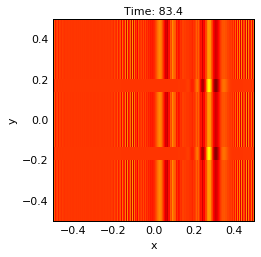
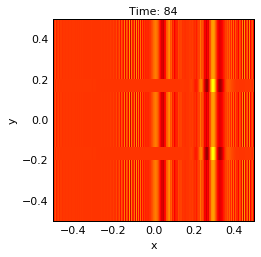
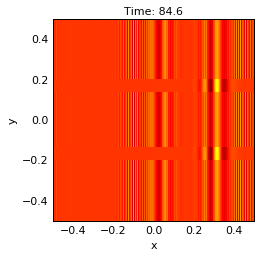
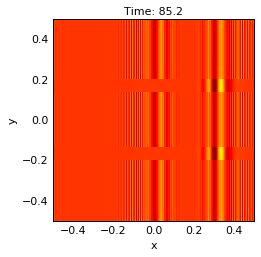
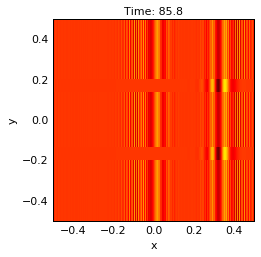
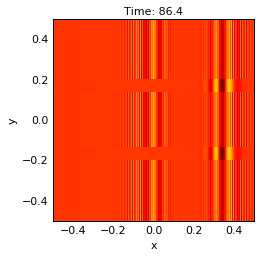
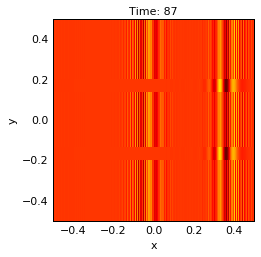
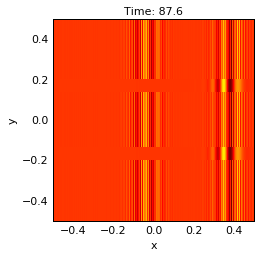
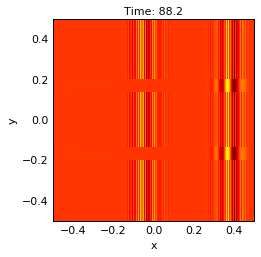
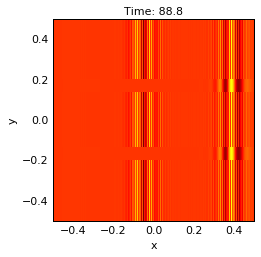
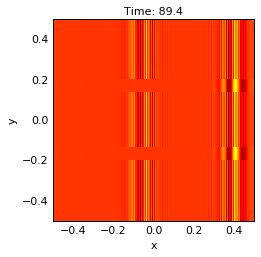
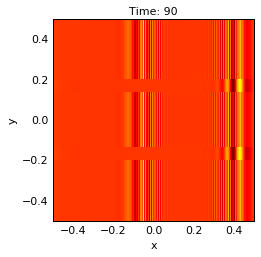
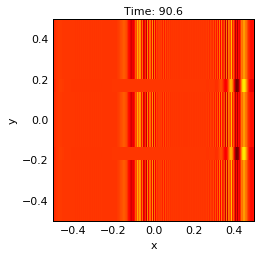
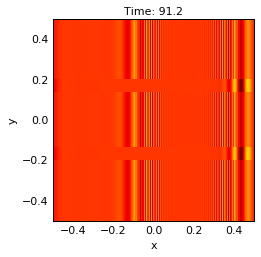
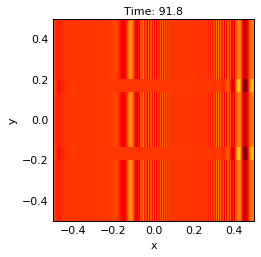
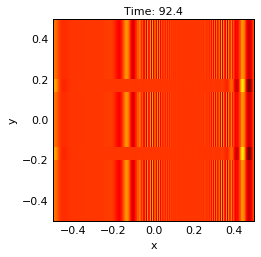
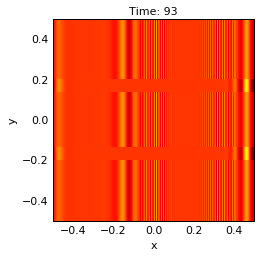
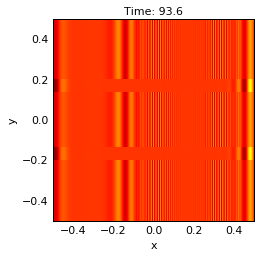
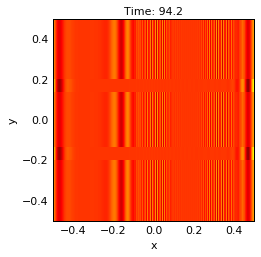
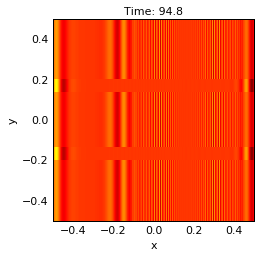
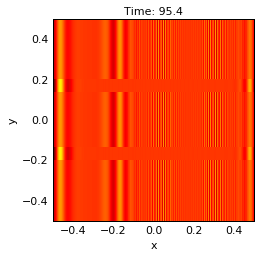
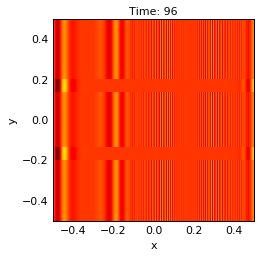
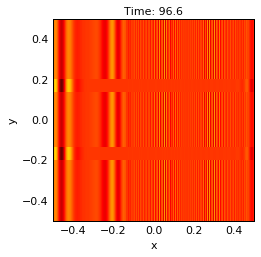
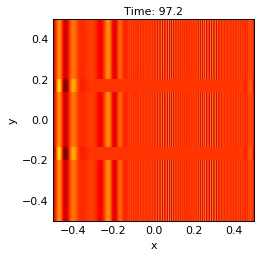
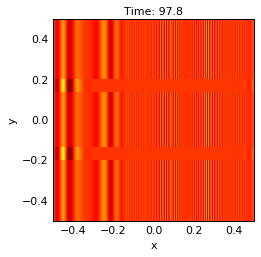
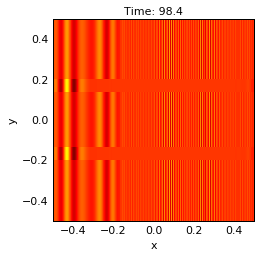
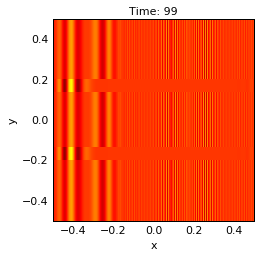
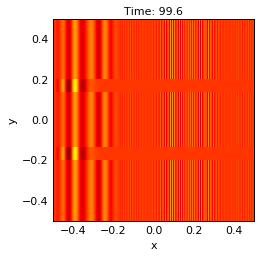
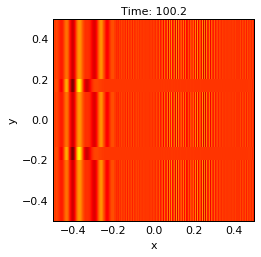
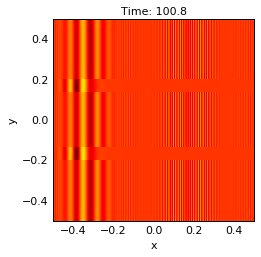
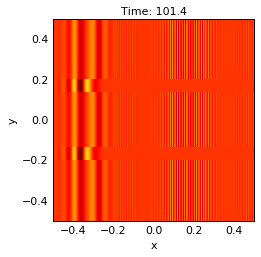
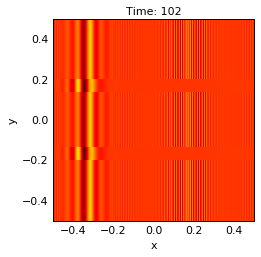
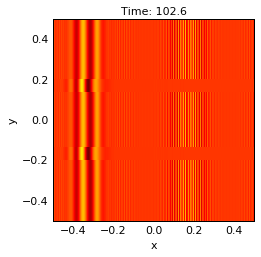
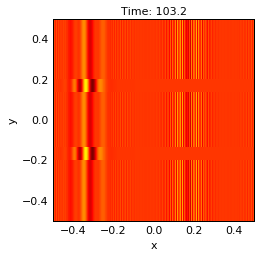
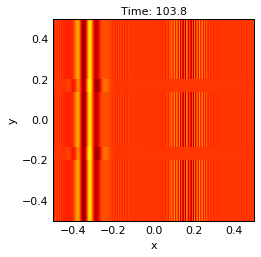
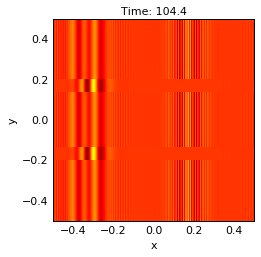
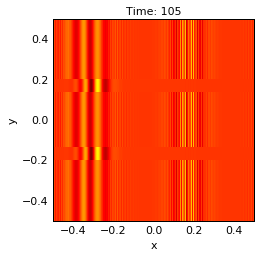
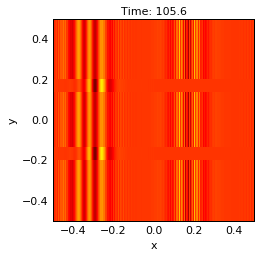
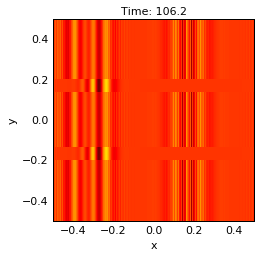
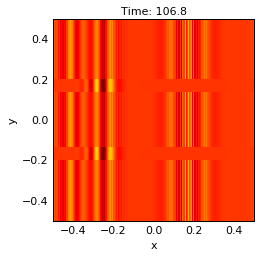
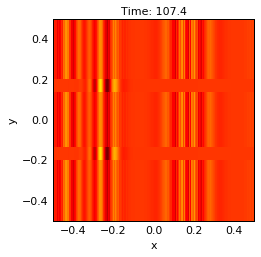
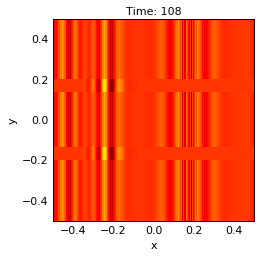
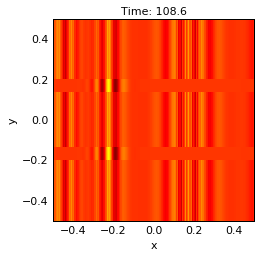
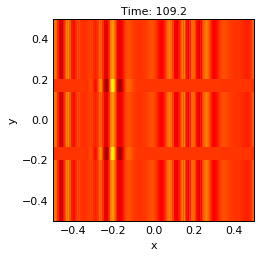
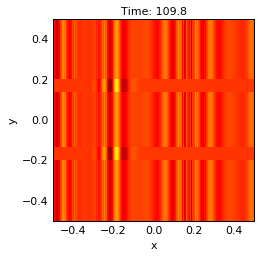
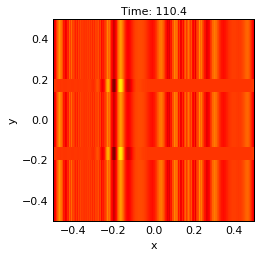
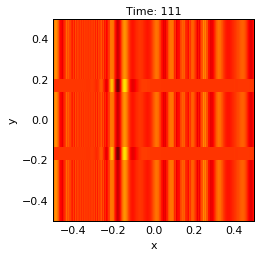
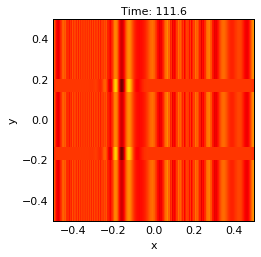
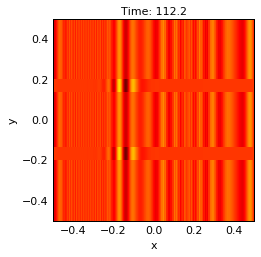
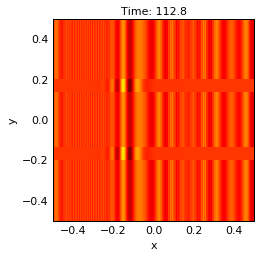
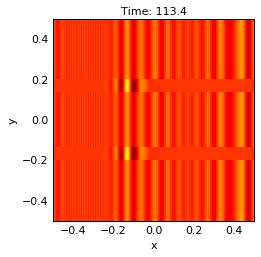
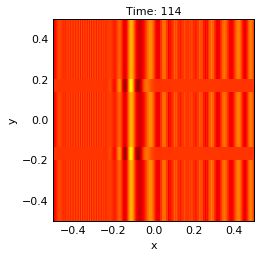
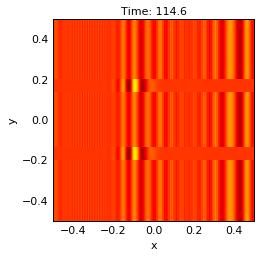
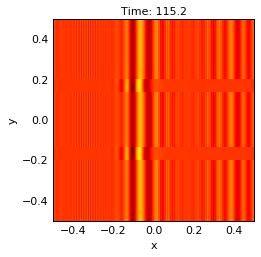
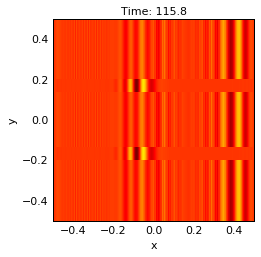
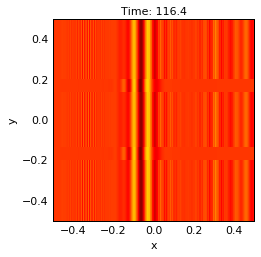
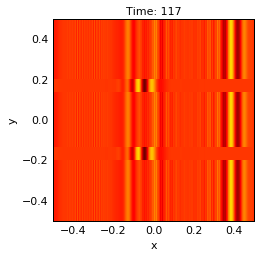
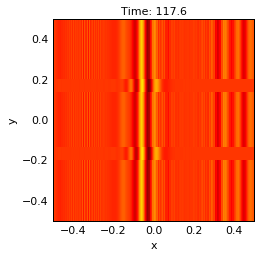
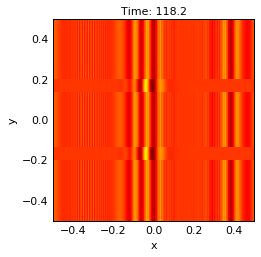
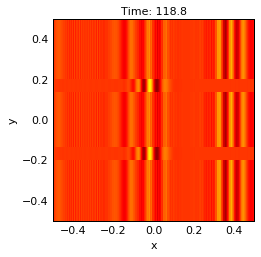

In [12]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Image(np.real(psi_r[:,:,i])))
            for i in range(0,steps-1)], kdims = ["Time"])

[[ 19.7392088   19.7392088   19.7392088  ...,  19.7392088   19.7392088
   19.7392088 ]
 [ 19.6078334   19.6078334   19.6078334  ...,  19.6078334   19.6078334
   19.6078334 ]
 [ 19.47689665  19.47689665  19.47689665 ...,  19.47689665  19.47689665
   19.47689665]
 ..., 
 [ 19.34639855  19.34639855  19.34639855 ...,  19.34639855  19.34639855
   19.34639855]
 [ 19.47689665  19.47689665  19.47689665 ...,  19.47689665  19.47689665
   19.47689665]
 [ 19.6078334   19.6078334   19.6078334  ...,  19.6078334   19.6078334
   19.6078334 ]]
